<a href="https://colab.research.google.com/github/lovegohome/TIL/blob/main/021_PreprocessVisualization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21년 06월 16일 

localhost :3306  (MySQL-root)

127.0.0.1:3306 

127.0.0.0:(fort)

- SQL - Pandas

sql = 'blahblah' 넣고 fetchall 하면 보기 힘들다. 
그래서 fetchall 한 값을 result에 넣고, 그 result를 또 DataFrame에 넣어서 보기 좋게 만드는 작업을 했다.

In [ ]:
!cd
sql = 'blahblah'
cursor.excute(sql)
result = cursor.fetchall()
df = pd.DataFrame(result)
df

In [ ]:
df.isnull().sum()
    #null 값이 몇 개 있난 체크 
df.values	# array 형식
data = df.values
# ix = [i for i in range (data.shape[1]) if i != 3]
data.shape
X = data[15:25,:2] # X

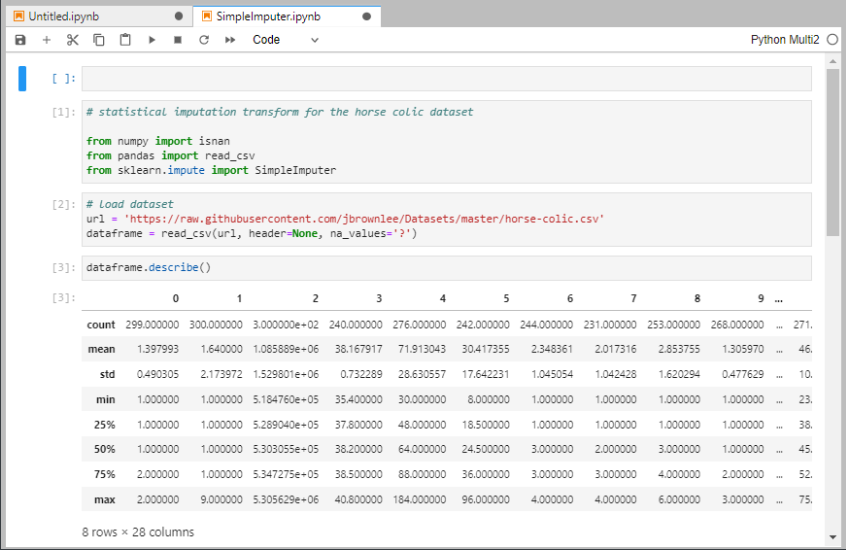

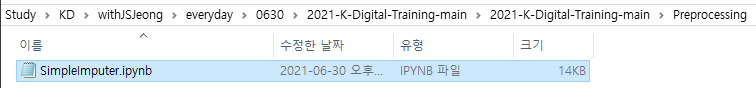

## NULL 처리 - sklearn

null 값 없애주는 작업 (이 폴더 안에 전처리 과정 내용 담김)
사이킷 런sklearn.imputer.SimpleImputer가 null 값을 채워준다. 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(X) # 2D ! 
Xtrans = imputer.transform(X)
Xtrans

## Data Visualization 

- https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py
- https://seaborn.pydata.org/  # gallery

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib, seaborn  =  visualization

### seaborn - 관계

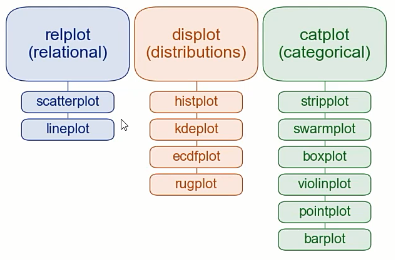

- displot = distribution(분포)
- relplot = 피어슨상관계수 볼 때 컬럼(feature)들 간의 
  선형관계(**Linear**)인지, 비선형관계(**Non-Linear**)인지를 직관적으로 보여줌 
  - lineplot - regression을 본다. 
- 변수들의 catagorical or numerical 특징을 직관적으로 보여줌.
- 아노바, 카이스퀘어 검증을 할 때 하나의 변수 안에 라벨을 다 찍었을 때 크기, 분포 등을 보여줌 

Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots()
#subplot : 기본으로 nrows=1, ncols=1 갖고 있음. row 하나, column 하나로 표 1개. 등등 더 표 만들어 줄 수 있음.

#fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig, ax = plt.subplots(1,1)
# ax[1,1]
# fig

#ax.plot([1,2,3,4],[1,4,2,3])
plt.plot([1,2,3,4],[1,4,2,3])
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

a = pandas.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
#np.random.rand -- 'rand' 0~1 표준정규분포에서 난수
a # DataFrame 형태인데 [ a.values ]로 만들면 array 형태로 만들어 줌 
a.mean() #각 열에 대한 평균 
a_asarray = a.values #numpy
a_asarray.mean() #numpy 평균, 전체 데이터에 대한 평균

plt.plot(a) #DataFrame으로도 뿌려지는 걸 확인했다. 

a_asarray.var() #numpy 분산 = sqr(표준편차)
#cf. sqrt = 제곱근 
b = np.matrix([[1, 2], [3, 4]])
b
b_asarray = np.asarray(b) # matrix는 asarray() 함수로 array 형식으로 변환
b_asarray
b_asarray.mean()

# B_asarray = b.values  : DataFrame은 .values로 array 형식으로 변환이 가능하지만
# matrix는 asarray() 함수로 array 형식으로 변환

x = np.linspace(0, 2, 100)
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend(loc=10, fontsize='xx-large')
#plt.legend(loc=10, fontsize='large')
#plt.legend()

fig, ax = plt.subplots(2,2)
ax[1,0].plot([1,2,3,4], [1,4,5,1])
ax[0,1].plot([1,2,3,4],[2,2,5,8])
fig.suptitle('good')         # fig 전체를 컨트롤
fig.supxlabel('Hello')
fig.supylabel('and You?')
ax[0,1].set_title('try')     # ax 해당 칸만 컨트롤
# 이 2가지를 같이 줘야 그림이 나옴 


## Seaborn

- boxplot : outliers 보려고 본다. 

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('tips.csv')
df.head(3)
sns.regplot(x='total_bill', y='tip', data=df);
#linear인지 non-linear인지 #x와 y의 회귀분석
sns.displot(x='smoker', hue='smoker', data=df)
# categorical을 넣어줘야 한다. 
sns.displot(x='sex', hue='day', data=df)
sns.displot(x='sex', hue='day',multiple='stack', data=df)
# layer는 섞어서 보여지는데, multiple='stack' 그 위로 쌓여서 보여짐
sns.histplot(x='sex', hue='day', multiple='stack', data=df)
# displot vs histplot
sns.scatterplot(x='total_bill', y='tip', hue='day', data=df)

penguins = sns.load_dataset("penguins") # pandas 내장데이터
penguins
penguins.groupby('species').describe() #groupby
penguins.groupby('species').count()
sns.histplot(data=penguins, x='flipper_length_mm', hue='species',
            multiple='stack') #histplot
sns.kdeplot(data=penguins, x='flipper_length_mm', hue='species',
            multiple='stack') #kdeplot
sns.displot(data=penguins, x='flipper_length_mm', hue='species',
            multiple='stack') #displot
sns.displot(data=penguins, x='flipper_length_mm', hue='species',
            col='species') # col
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='island', data=penguins)
# 파생변수를 만든다고 하면 '발의 길이와 몸의 크기를 보고 도시, 성별' 알 수 있다. 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()
tips.describe()
# 각 column마다의 표준편차(std)를 비교하기 위해서 normalization(정규화)를 해야 한다 : MinMaxScalar()  ... 평균 0, 분산 1 
#tips.info()

t_bill = tips.total_bill
t_bill.describe()
# tips.total_bill.describe() : 같은 값 나옴 

plt.boxplot(t_bill)
# plt.boxplot(tips.total_bill) : 뭔가 설명이 많이 붙어 나옴 
# plt.boxplot(tips) : 에러 뜸, column 하나만 사용
plt.show()

plt.boxplot(t_bill, labels=['total_bill']) 
# labels=['----']
# set_xlabel : 다른 메소드
plt.show()

t_sns_bill = sns.boxplot(x='total_bill', data=tips)
#plt.boxplot(t_bill)  plt vs sns 비교 
t_sns_tips = sns.boxplot(x='tip', data=tips)
sns.regplot(x="total_bill", y="tip", data= tips)
sns.regplot(x="size", y="tip", data= tips)

tips.total_bill.hist()
sns.displot(x=t_bill, bins=50)
# sns.histplot(x=t_bill, bins=50)
# sns.distplot(x=t_bill, bins=50) # 곧 없어질 거라고 경고 뜸 


## 전처리 - 스케일링: 표준화, standardization

- Scikit-Learn에서 제공하는 스케일러들
  1) StandardScaler : 기본 스케일. 평균과 표준편차 사용
  2) MinMaxScaler : 최대/최소값이 각각 1,0이 되도록 스케일링
  3) MaxAbsScaler : 최대절대값과 0이 각각 1,0이 되도록 스케일링
  4) RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용. 
       						아웃라이어의 영향을 최소화

- label 값을 갖는 sex, smoker, day 등을 엔코딩을 할 건데, 그 전에

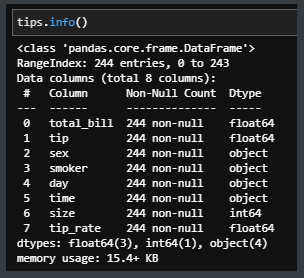

 쌍대 비교를 할 경우가 많다. 
예를 들어서, 2명씩 짝을 지어 온 사람이 몇 그룹이고, 3명씩 온 사람이 몇 그룹?
그 때 사용하는 것이 crosstab이다. 그리고 groupby도 많이 쓴다. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling

tips = pd.read_csv('tips.csv')
tips.info()
tips.profile_report()

#crosstab
pd.crosstab(index=tips['size'], columns='count')
pd.crosstab(index=tips['size'], columns='count').hist()
pd.crosstab(index=tips['size'], columns='count').plot()
size.plot.bar()
pd.crosstab(index=tips['size'], columns=tips['tip'])

pd.crosstab(index=tips['smoker'], columns='sex')
pd.crosstab(index=tips['smoker'], columns=tips['sex'])
pd.crosstab(tips.smoker, tips.sex) #column 지정여부의 차이점 

size = pd.crosstab(index=tips['size'],columns='count')
size_sex = pd.crosstab(index=tips['size'], columns=tips['sex'])

#plot.bar()
size.plot.bar()
size_sex.plot.bar()

# 파생변수
# rate & feature추가
tip_rate=tips["tip"] / tips["total_bill"]
tips['tip_rate']=(tips["tip"] / tips["total_bill"])
tips.describe()
# top_tip = (tips['tip_rate'] > 0.7) # nope
tips[tips['tip_rate']>0.7] #index를 집어 넣는 효과

tips.profile_report()
# tip_rate와 total_bill하고 음의 관계
# sns.regplot(x='total_bill', y='tip', data=tips) 에서는 우상향 그래프가 나왔지만 ... 아니야 이거 설명이 좀 이상하다. 
# tip_rate에는 total_bill이 분모로 들어가 있잖아. 그러니깐 분모가 커질 수록 tip_rate가 작아지는 거지. 총 비용이 커질 수록 tip이 줄어든다는 설명은 옳지 않아 보인다. 
# 왜냐면 tip과 total_bill과는 양의 관계!
# 반면에 size와 tip, tip_rate를 생각해 볼 수는 있을 것 같다. 2명씩 오는 게 이득? 흠.. 어렵다. 
tips.corr() # Correlations

# 이 데이터 분석을 해서 strory를 만들 수 있어야 한다. so what. 
# 그리고 추가로 categorical 데이터를 encoding해서 8*8프로파일링을 보고도 분석을 하게 된다. 

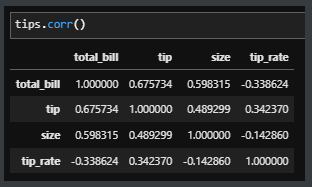

In [ ]:
#위에서 이어서 간다고 치면 

sns.pairplot(tips.loc[:,['total_bill','tip']])


tips.head(3)

# Encoding
tips['sex']=tips['sex'].replace({'Female': 0, 'Male':1})
#dictionary 형태
tips.head(3) # 체크

tips['day'].unique() # day에 사용된 값만 보여짐
#tips['day'] : 244개 행의 모든 값이 나옴
tips.groupby(tips['day']).count()
pd.crosstab(index=tips['day'],columns='count')
tips.groupby([tips['day'], tips['time']]).count()
#groupby


tips['smoker']=tips['smoker'].replace({'No': 0, 'Yes':1})
tips['day']=tips['day'].replace({'Thur': 0, 'Fri':1, 'Sat': 2, 'Sun': 3})
tips['time']=tips['time'].replace({'Lunch': 0, 'Dinner':1})
tips.head(3)
tips.profile_report()

## 목표변수(인과관계 / 상관관계)

빅쇼트 영화에서도 마찬가지로, 중요한 건 뭘 분석할지에 대한 목표변수! 

- 무엇을 예측하는가? (분석)
  ex) 부동산 담보대출 고객 중에서 누가 향후 90일 내에 조기 상황할 것인가

- (예측한 것을 갖고) 무엇을 할 것인가? (so what, something to do, story)
  부동산 담보대출 채권의 가치를 계산한 후 다른 은행에 팔아 넘길지 여부를 결정한다. 

  - 방향성: active vs passive

  - active: 
    예측의 도메인에서 극성이 있다.
    ex) 추천 영상 _ 유튜브 > 오래 머물도록 해야 광고수익 상승

    - 여기서 목표변수는 오래 머물도록 하는 것 
    - 관심있는 영상 계속 보여주는 것: 영상추천 모델의 목표 

    ex) 또 코로나 같은 바이러스 창궐할 거 같다. 주식을 사자 = active
    action, money

  - passive: 
    ex) 페스워드 틀리면 보여주는 CAPTCHA
    못 가게 포트를 자르거나 막는 것 
    recieve, 돈 안들고 단순. resource 안 들어가는 것

  - 그래서 SOMETHING TO DO를 하기 위해
    **ab테스트**를 하는 것이고 **예측**을 하는 것임. 

- 보고서를 쓸 때, (summary에 포함)
  이 보고서가 active한 것인지, passive한 것인지 알아야 한다. 

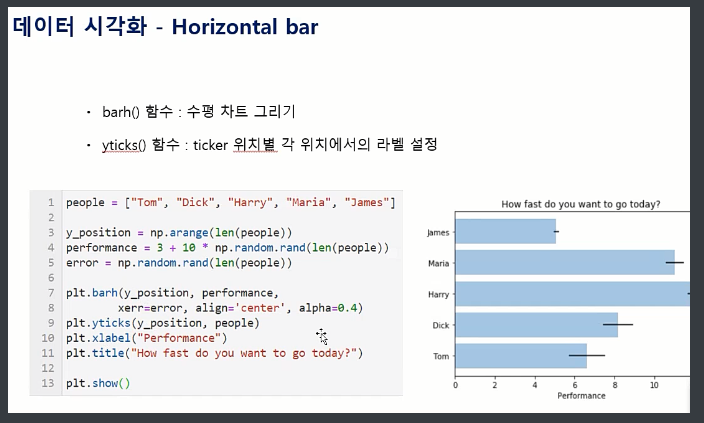

kaggle에서 시각화한 자료들 볼 수 있다. 

ex) e commerce - code - 시각화 자료 참조

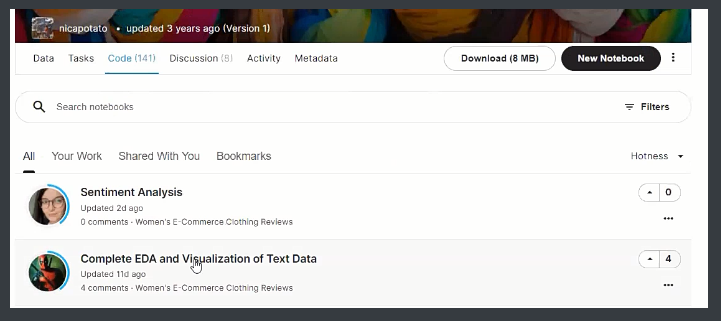

## cf
Profile볼 때 제일 먼저 볼 건 : Warnings / multiple correlation

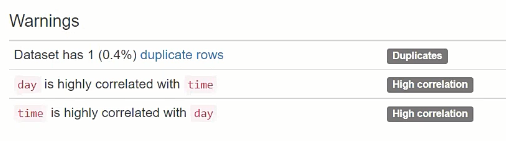

상관관계

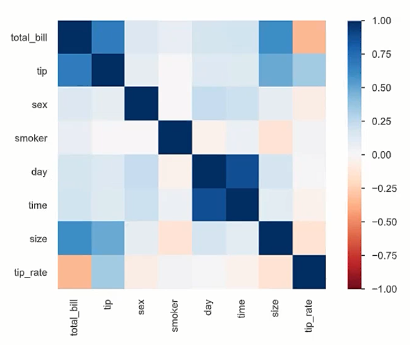

그렇다고 점심, 저녁 장사가 있는데 없앨 수 없을 거 같다. 

  그래도 얼마나 유사한지 확인: 0.874366


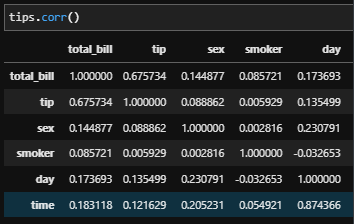


  2. **궁극적으로 무엇을 예측해야 하는가, 인과관계**
     이후에 인과관계를 보려면 필요한 것 = target variable(목표변수)
     목표변수가 정의되어야 인과관계를 볼 수 있다. 
     현재 data set을 보면서 무엇을 forecasting할지 선택 
     ex) 목표변수 

        	1. 매출(total_bill)
        	2. tip
        	3. 요일별 팀 size
        	4. 요일별 방문 예상 팀 수
            토요일에 손님 적으면 아르바이트생 그에 맞춰서 뽑는다.
            랍스타 재고 같은 것도 생각해 볼 수 있다. 

  3. 목표변수가 잡히면, 나머지 변수는 input parameter(feature)가 된다.
     tip = y, 나머지 변수 = X(학습데이터 column이 되는 거다.)

     cf. 빅데이터-target, 통계-y hat 

     cf. 파생변수 활용

  4. 목표변수를 4개를 잡으면 
     모델이 4개가 나온다. 
     cf. Univariate냐, Multivariate냐에 따라도 달라지지만. 
     전제가 보통 Univariate(예측 값이 하나)여서 목표변수가 4개면 모델이 4개가 나온다고 한다. 
     Multivariate(2개가 같이 움직이는 경우가 있다)

```
 **Univariate** vs **Multivariate** (단변량 vs 다변량)
 종속변수 Y의 개수에 따라 구분이 가능하다. 

 - **Univariate** : 종속변수가 하나인 경우. 대부분의 분석이 이에 해당될 수 있음.  
 - **Multivariate** : 종속변수가 여러 개인 경우
 ```

 cf. 있으면 더 좋았을 DATA는 무엇인지. 

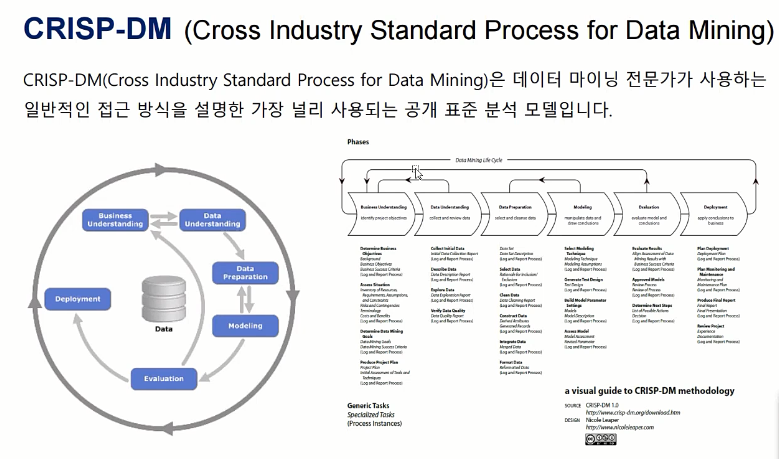

이 과정을 거치면서 모델을 구축해 가는 것이다. 
내가 어디서 뭘 하고 있는 건지 알아야 한다. 